# Word embeddings usando Tensorflow


Fuentes y más información:
* https://medium.com/towards-data-science/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac
* https://www.tensorflow.org/get_started/mnist/beginners
* https://www.tensorflow.org/api_docs/python/tf/reduce_mean
* http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/

Bibliotecas necesarias

In [1]:
import numpy as np
import tensorflow as tf


Corpus de trabajo.

In [2]:
corpus = 'La felicidad es solamente la ausencia del dolor . El hombre ha hecho de la Tierra un infierno para los animales . La vida es solo la muerte aplazada . Cada partida es una anticipacion de la muerte y cada encuentro una anticipacion de la resurreccion . A excepcion del hombre ningun ser se maravilla de su propia existencia . Ni tanto que queme al santo ni tanto que no lo alumbre . No todo el que trae levita es persona principal . Para uno que madruga hay otro que no se duerme . Crea fama y echate a dormir . De vez en cuando se aprende algo pero se olvida el dia entero . El destino es el que baraja las cartas pero nosotros los que las jugamos . La soledad es la suerte de todos los espiritus excelentes . Hay seres de los que no se concibe como llegan a caminar sobre dos piernas aunque eso no signifique mucho . Las religiones como las luciernagas necesitan de la oscuridad para brillar . No hay ningun viento favorable para el que no sabe a que puerto se dirige . Pocas veces pensamos en lo que tenemos pero siempre en lo que nos falta . Se dice que la maldad se expia en aquel mundo pero la estupidez se expia en este . Toda vida es sufrimiento . Los hombres vulgares solo piensan en como pasar el tiempo un hombre inteligente procura aprovecharlo '
corpus = corpus.lower()
print(corpus)

la felicidad es solamente la ausencia del dolor . el hombre ha hecho de la tierra un infierno para los animales . la vida es solo la muerte aplazada . cada partida es una anticipacion de la muerte y cada encuentro una anticipacion de la resurreccion . a excepcion del hombre ningun ser se maravilla de su propia existencia . ni tanto que queme al santo ni tanto que no lo alumbre . no todo el que trae levita es persona principal . para uno que madruga hay otro que no se duerme . crea fama y echate a dormir . de vez en cuando se aprende algo pero se olvida el dia entero . el destino es el que baraja las cartas pero nosotros los que las jugamos . la soledad es la suerte de todos los espiritus excelentes . hay seres de los que no se concibe como llegan a caminar sobre dos piernas aunque eso no signifique mucho . las religiones como las luciernagas necesitan de la oscuridad para brillar . no hay ningun viento favorable para el que no sabe a que puerto se dirige . pocas veces pensamos en lo qu

Se genera una lista de todas las palabras dentro del corpus.

In [3]:
stop_list = ['.']
words = [_ for _ in corpus.split() 
         if _ not in stop_list] # Se omiten los caracteres que estén en la lista de paro
print(words)

['la', 'felicidad', 'es', 'solamente', 'la', 'ausencia', 'del', 'dolor', 'el', 'hombre', 'ha', 'hecho', 'de', 'la', 'tierra', 'un', 'infierno', 'para', 'los', 'animales', 'la', 'vida', 'es', 'solo', 'la', 'muerte', 'aplazada', 'cada', 'partida', 'es', 'una', 'anticipacion', 'de', 'la', 'muerte', 'y', 'cada', 'encuentro', 'una', 'anticipacion', 'de', 'la', 'resurreccion', 'a', 'excepcion', 'del', 'hombre', 'ningun', 'ser', 'se', 'maravilla', 'de', 'su', 'propia', 'existencia', 'ni', 'tanto', 'que', 'queme', 'al', 'santo', 'ni', 'tanto', 'que', 'no', 'lo', 'alumbre', 'no', 'todo', 'el', 'que', 'trae', 'levita', 'es', 'persona', 'principal', 'para', 'uno', 'que', 'madruga', 'hay', 'otro', 'que', 'no', 'se', 'duerme', 'crea', 'fama', 'y', 'echate', 'a', 'dormir', 'de', 'vez', 'en', 'cuando', 'se', 'aprende', 'algo', 'pero', 'se', 'olvida', 'el', 'dia', 'entero', 'el', 'destino', 'es', 'el', 'que', 'baraja', 'las', 'cartas', 'pero', 'nosotros', 'los', 'que', 'las', 'jugamos', 'la', 'soledad

Se obtiene un conjunto sin repeticiones de todas las palabras del corpus.

In [4]:
words = set(words)
print(words)

{'este', 'sufrimiento', 'puerto', 'excepcion', 'ha', 'no', 'baraja', 'llegan', 'ser', 'pensamos', 'aunque', 'dirige', 'la', 'estupidez', 'queme', 'que', 'sobre', 'a', 'caminar', 'encuentro', 'ausencia', 'jugamos', 'aquel', 'destino', 'viento', 'piernas', 'propia', 'y', 'maravilla', 'soledad', 'favorable', 'concibe', 'falta', 'solo', 'expia', 'tanto', 'alumbre', 'pero', 'cuando', 'hombres', 'dolor', 'aplazada', 'siempre', 'nosotros', 'hombre', 'veces', 'aprende', 'tenemos', 'una', 'algo', 'levita', 'dice', 'oscuridad', 'vulgares', 'mundo', 'ningun', 'nos', 'pocas', 'suerte', 'su', 'para', 'procura', 'seres', 'infierno', 'signifique', 'se', 'al', 'como', 'espiritus', 'todo', 'uno', 'madruga', 'inteligente', 'partida', 'de', 'dos', 'trae', 'dormir', 'cartas', 'crea', 'maldad', 'sabe', 'dia', 'persona', 'animales', 'pasar', 'hay', 'existencia', 'los', 'vida', 'resurreccion', 'toda', 'necesitan', 'brillar', 'las', 'luciernagas', 'hecho', 'cada', 'tiempo', 'eso', 'mucho', 'solamente', 'enter

Se les asigna una representación numérica a las palabras para que puedan ser interpretadas por la computadora.

In [6]:
word2int = {}
int2word = {}

vocab_size = len(words)

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
    
print(word2int['vida']) # Número correspondiente a la palabra 'libro'.
print(int2word[3])       # Palabra correspondiente al número 3.

89
excepcion


* Se obtiene  una lista de frases del corpus.
* Se obtiene una lista de cada frase del corpus.

In [7]:
raw_sentences = corpus.split('.')

print(raw_sentences)
sentences = [_.split() for _ in raw_sentences]
print(sentences)


['la felicidad es solamente la ausencia del dolor ', ' el hombre ha hecho de la tierra un infierno para los animales ', ' la vida es solo la muerte aplazada ', ' cada partida es una anticipacion de la muerte y cada encuentro una anticipacion de la resurreccion ', ' a excepcion del hombre ningun ser se maravilla de su propia existencia ', ' ni tanto que queme al santo ni tanto que no lo alumbre ', ' no todo el que trae levita es persona principal ', ' para uno que madruga hay otro que no se duerme ', ' crea fama y echate a dormir ', ' de vez en cuando se aprende algo pero se olvida el dia entero ', ' el destino es el que baraja las cartas pero nosotros los que las jugamos ', ' la soledad es la suerte de todos los espiritus excelentes ', ' hay seres de los que no se concibe como llegan a caminar sobre dos piernas aunque eso no signifique mucho ', ' las religiones como las luciernagas necesitan de la oscuridad para brillar ', ' no hay ningun viento favorable para el que no sabe a que puer

Se obtienen las palabras vecinas con una ventana de 2 para después usarlas como datos de entrenamiento.

In [8]:
data = []

WINDOW_SIZE = 2

for sentence in sentences:
    for word_index,word in enumerate(sentence):
        for neighbor_word in sentence[max(word_index - WINDOW_SIZE,0):
                                      min(word_index + WINDOW_SIZE,len(sentence) + 1)]:
            if neighbor_word != word:
                data.append([word,neighbor_word])

print(data)

[['la', 'felicidad'], ['felicidad', 'la'], ['felicidad', 'es'], ['es', 'la'], ['es', 'felicidad'], ['es', 'solamente'], ['solamente', 'felicidad'], ['solamente', 'es'], ['solamente', 'la'], ['la', 'es'], ['la', 'solamente'], ['la', 'ausencia'], ['ausencia', 'solamente'], ['ausencia', 'la'], ['ausencia', 'del'], ['del', 'la'], ['del', 'ausencia'], ['del', 'dolor'], ['dolor', 'ausencia'], ['dolor', 'del'], ['el', 'hombre'], ['hombre', 'el'], ['hombre', 'ha'], ['ha', 'el'], ['ha', 'hombre'], ['ha', 'hecho'], ['hecho', 'hombre'], ['hecho', 'ha'], ['hecho', 'de'], ['de', 'ha'], ['de', 'hecho'], ['de', 'la'], ['la', 'hecho'], ['la', 'de'], ['la', 'tierra'], ['tierra', 'de'], ['tierra', 'la'], ['tierra', 'un'], ['un', 'la'], ['un', 'tierra'], ['un', 'infierno'], ['infierno', 'tierra'], ['infierno', 'un'], ['infierno', 'para'], ['para', 'un'], ['para', 'infierno'], ['para', 'los'], ['los', 'infierno'], ['los', 'para'], ['los', 'animales'], ['animales', 'para'], ['animales', 'los'], ['la', 'vid

Función que obtiene la representación one hot vector de un número.

In [9]:
def one_hot_vector(data_index,vocab_size):
    ohv = np.zeros(vocab_size)
    ohv[data_index] = 1
    return ohv

Se obtienen one hot vectors de la lista de palabras de entrenamiento.

In [10]:
x_train = [(one_hot_vector(word2int[data_word[0]],vocab_size)) for data_word in data ] # input word
y_train = [(one_hot_vector(word2int[data_word[1]],vocab_size)) for data_word in data ] # output word

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print(x_train.shape, y_train.shape)

(599, 127) (599, 127)


# Tensorflow model

In [11]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

* Se declara la matriz de pesos, bias.
* La variable `hidden_representation` es el word embedding y se define como:

    $h = x*W_1 + bias$

In [12]:
EMBEDDING_DIM = 5 # Dimensión de los words embeddings

W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)



Se declaran variables para realizar la conversión de word embeddings a vectores del tamaño del vocabulario.
De los word embeddings se regresa a un vector de probabilidades de dimensión del vocabulario y con la función de softmax se hace una predicción de las palabras vecinas de una palabra en específico.

In [13]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

# Training

In [16]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 12000
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    if not _ % 2000:
        print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))
    
    
    

loss is :  7.9939
loss is :  3.93478
loss is :  3.50734
loss is :  3.21074
loss is :  3.0054
loss is :  2.86199


In [17]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ -8.80163252e-01   1.10026145e+00   8.82909223e-02  -7.10664630e-01
    2.05653358e+00]
 [ -8.39334071e-01  -1.90222949e-01   8.97953510e-01   1.63591552e+00
   -7.77758956e-01]
 [  3.74651700e-01   5.53882420e-01   1.13743639e+00  -2.59279042e-01
    7.79553711e-01]
 [  9.92700100e-01   2.15659451e+00   2.54136753e+00   1.97060272e-01
   -4.64388400e-01]
 [  6.76280856e-01   1.66573077e-01   1.48376036e+00   9.38835859e-01
    4.47469860e-01]
 [  1.49255884e+00  -2.16850138e+00   1.49472415e-01   2.18242362e-01
   -4.69892889e-01]
 [  1.71252990e+00  -5.70798397e-01   5.78018069e-01   1.85856357e-01
    2.84940124e-01]
 [  6.72434390e-01   2.53301215e+00  -6.38146922e-02   4.11480814e-01
   -2.00311613e+00]
 [  7.62790084e-01   2.65136212e-01   2.96726316e-01  -1.82080150e+00
   -9.57624435e-01]
 [ -9.89072919e-01   2.58334613e+00  -9.01885152e-01  -4.44246024e-01
    1.73892927e+00]
 [ -1.66292787e-01  -1.01846647e+00  -1.50877631e+00   1.52324831e+00
   -1.26289153e+00]
 [  1.4326

Lo importante del entrenamiento no es tanto la certeza de predicción sino los valores de los word embeddings.

Word embeddings + bias

In [18]:
vectors = sess.run(W1 + b1)
print(vectors)

[[ -2.56440639e-01   9.10249770e-01   1.37169361e-02  -4.84763265e-01
    2.39676189e+00]
 [ -2.15611458e-01  -3.80234599e-01   8.23379517e-01   1.86181688e+00
   -4.37530547e-01]
 [  9.98374343e-01   3.63870740e-01   1.06286240e+00  -3.33776921e-02
    1.11978209e+00]
 [  1.61642265e+00   1.96658289e+00   2.46679354e+00   4.22961622e-01
   -1.24159992e-01]
 [  1.30000353e+00  -2.34385878e-02   1.40918636e+00   1.16473722e+00
    7.87698269e-01]
 [  2.11628151e+00  -2.35851312e+00   7.48984292e-02   4.44143713e-01
   -1.29664481e-01]
 [  2.33625245e+00  -7.60810077e-01   5.03444076e-01   4.11757708e-01
    6.25168562e-01]
 [  1.29615700e+00   2.34300041e+00  -1.38388678e-01   6.37382150e-01
   -1.66288769e+00]
 [  1.38651276e+00   7.51245469e-02   2.22152323e-01  -1.59490013e+00
   -6.17395997e-01]
 [ -3.65350306e-01   2.39333439e+00  -9.76459146e-01  -2.18344674e-01
    2.07915759e+00]
 [  4.57429826e-01  -1.20847809e+00  -1.58335030e+00   1.74914968e+00
   -9.22663093e-01]
 [  2.0563

Word embedding de `libro`

In [19]:
print(vectors[ word2int['vida'] ])

[ 0.03700602 -0.28112411 -0.29716682  2.12082314 -1.11066711]


# Gráficas

Para reducción de dimensionalidad y poder mostrar en una gráfica 2D.

In [20]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=42)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)


In [21]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

este [-0.91101604 -0.41237093]
sufrimiento [ 0.7751956   0.63172128]
puerto [-0.67156319 -0.74094729]
excepcion [-0.77929213  0.62666081]
ha [-0.55249612  0.83351547]
no [ 0.6666089  -0.74540765]
baraja [-0.1795433  -0.98375007]
llegan [-0.78827185  0.61532715]
ser [ 0.68682147 -0.72682616]
pensamos [-0.95312125 -0.30258863]
aunque [ 0.92373493  0.38303234]
dirige [-0.44809815  0.89398436]
la [-0.95241541  0.30480302]
estupidez [-0.19001243 -0.98178168]
queme [-0.97217324  0.2342631 ]
que [-0.45280045  0.89161188]
sobre [ 0.44092182  0.89754552]
a [-0.90640802  0.42240324]
caminar [ 0.27917573  0.96024003]
encuentro [-0.98480919  0.17364005]
ausencia [-0.89229017  0.45146235]
jugamos [-0.44338216 -0.89633267]
aquel [-0.38216491  0.92409414]
destino [-0.99935637 -0.03587252]
viento [-0.81445557 -0.58022592]
piernas [-0.2286032   0.97351969]
propia [-0.36662325  0.93036949]
y [ 0.92798226 -0.37262436]
maravilla [-0.80670791 -0.59095037]
soledad [ 0.19238505  0.98131952]
favorable [ 0.910

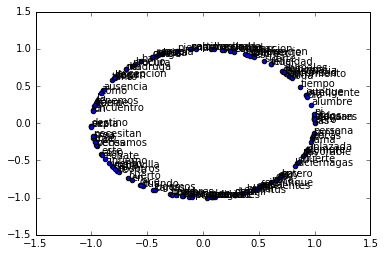

In [26]:
import mpld3
mpld3.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
    plt.scatter(vectors[word2int[word]][0],vectors[word2int[word]][1])
    
plt.savefig('w2v')
plt.show()